2 401 / 5 000
Wyniki tłumaczenia
Te dwa zestawy danych dotyczą czerwonych i białych wariantów portugalskiego wina „Vinho Verde”. Więcej szczegółów można znaleźć w odnośniku [Cortez et al., 2009]. Ze względu na kwestie prywatności i logistyki dostępne są tylko zmienne fizykochemiczne (wkłady) i sensoryczne (wyjście) (np. brak danych o rodzajach winogron, marce wina, cenie sprzedaży wina itp.).

Te zestawy danych można przeglądać jako zadania klasyfikacji lub regresji. Klasy są uporządkowane, a nie zbilansowane (np. jest znacznie więcej win normalnych niż doskonałych lub słabych). Treść Aby uzyskać więcej informacji, przeczytaj [Cortez i in., 2009]. Zmienne wejściowe (na podstawie testów fizykochemicznych): 1 - kwasowość związana 2 - kwasowość lotna 3 - kwas cytrynowy 4 - cukier resztkowy 5 - chlorki 6 - wolny dwutlenek siarki 7 - całkowity dwutlenek siarki 8 - gęstość 9 - pH 10 - siarczany 11 - alkohol Zmienna wyjściowa (na podstawie danych sensorycznych): 12 - jakość (ocena od 0 do 10) Interesującą rzeczą do zrobienia poza modelowaniem regresji jest ustawienie arbitralnego punktu odcięcia dla zmiennej zależnej (jakość wina) na np. 7 lub wyższy zostaje sklasyfikowany jako „dobry/1”, a reszta jako „niedobry/0”. Pozwala to ćwiczyć z hiperparametrowym strojeniem m.in. algorytmy drzew decyzyjnych patrzące na krzywą ROC i wartość AUC. Bez wykonywania jakiejkolwiek inżynierii funkcji lub nadmiernego dopasowania, powinieneś być w stanie uzyskać AUC 0,88 (nawet bez użycia algorytmu losowego lasu)

KNIME to świetne narzędzie (GUI), które można do tego wykorzystać. 1 - Czytnik plików (dla csv) do węzła korelacji liniowej i do interaktywnego histogramu dla podstawowego EDA. 2- Czytnik plików do 'Rule Engine Node', aby zmienić 10-punktową skalę na zmienną dychtomu (dobre wino i reszta), kod do umieszczenia w silniku reguł wygląda mniej więcej tak:

 > 6,5 => "dobry"
TRUE => „zły” 3- wyjście węzła silnika reguł do wejścia węzła filtra kolumny w celu odfiltrowania oryginalnej 10-punktowej funkcji (co zapobiega wyciekom) 4- wyjście węzła filtra kolumny do wejścia węzła partycjonowania (standardowy podział pociągów/testów, np. 75%/25%, wybierz losowy lub warstwowy 7- Dane wyjściowe z węzła uczącego drzewa decyzyjnego do wprowadzenia danych wejściowych węzła Drzewa decyzyjnego 8- Dane wyjściowe drzewa decyzyjnego do wprowadzenia węzła ROC.. (tutaj można ocenić bazę modelu na podstawie wartości AUC)

### Feature Enggineering

### Feature Enggineering

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import time
import random

random.seed(100)

In [2]:
# Importing the dataset
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# #Making binary classificaion for the response variable.
from sklearn.preprocessing import LabelEncoder
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

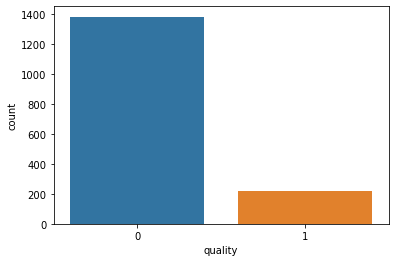

In [4]:
#plotting the response variable
sns.countplot(wine['quality'])

In [5]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

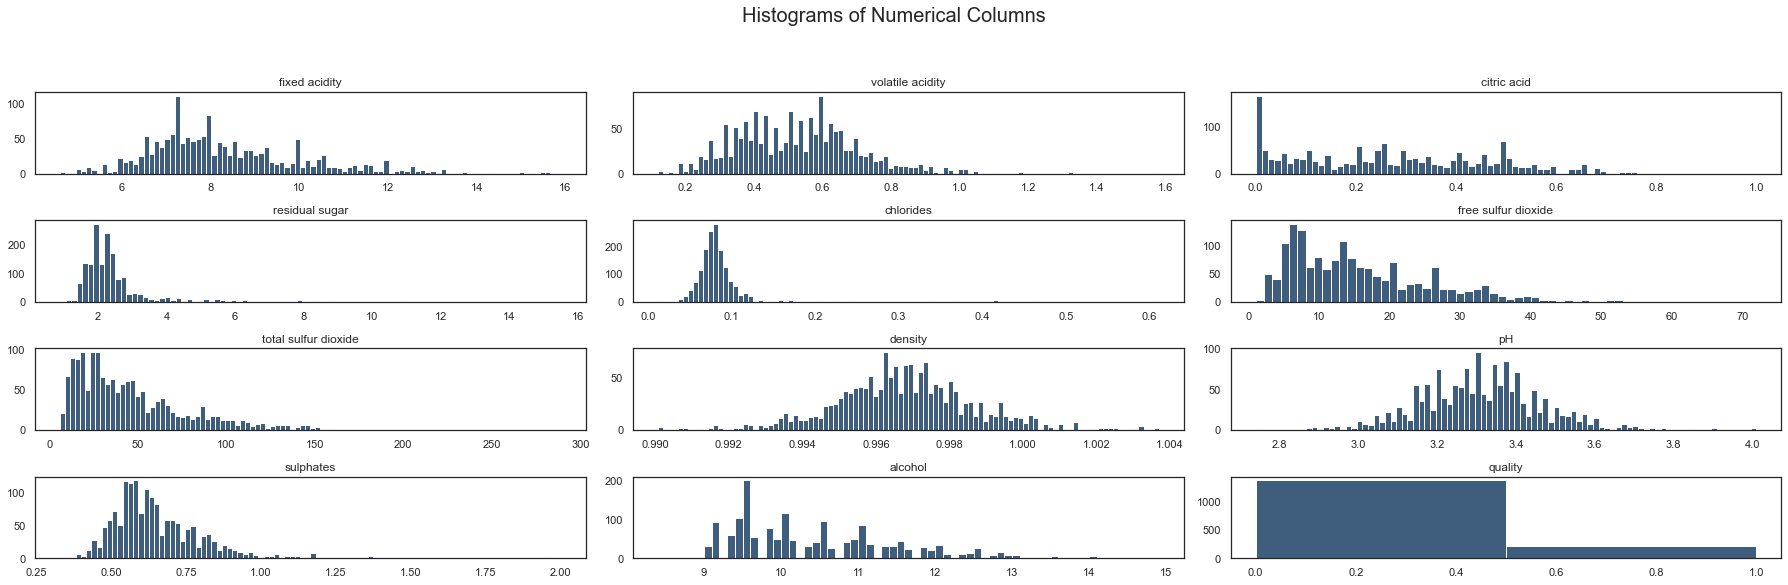

In [38]:
## Histograms
fig = plt.figure(figsize=(25, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(wine.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(wine.columns.values[i])

    vals = np.size(wine.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(wine.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<AxesSubplot:title={'center':'Correlation with quality'}>

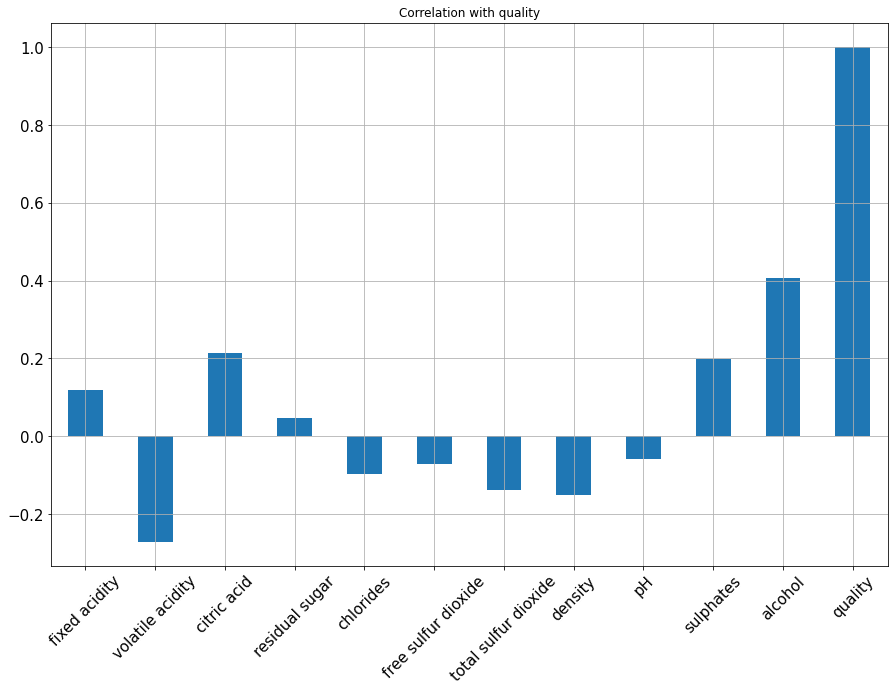

In [7]:
#Correlation with Quality with respect to attributes
wine.corrwith(wine.quality).plot.bar(
        figsize = (15, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

In [14]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = wine.corr()
corr.head(9)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283


C:\Users\tk\AppData\Local\Temp\ipykernel_10532\1981046039.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

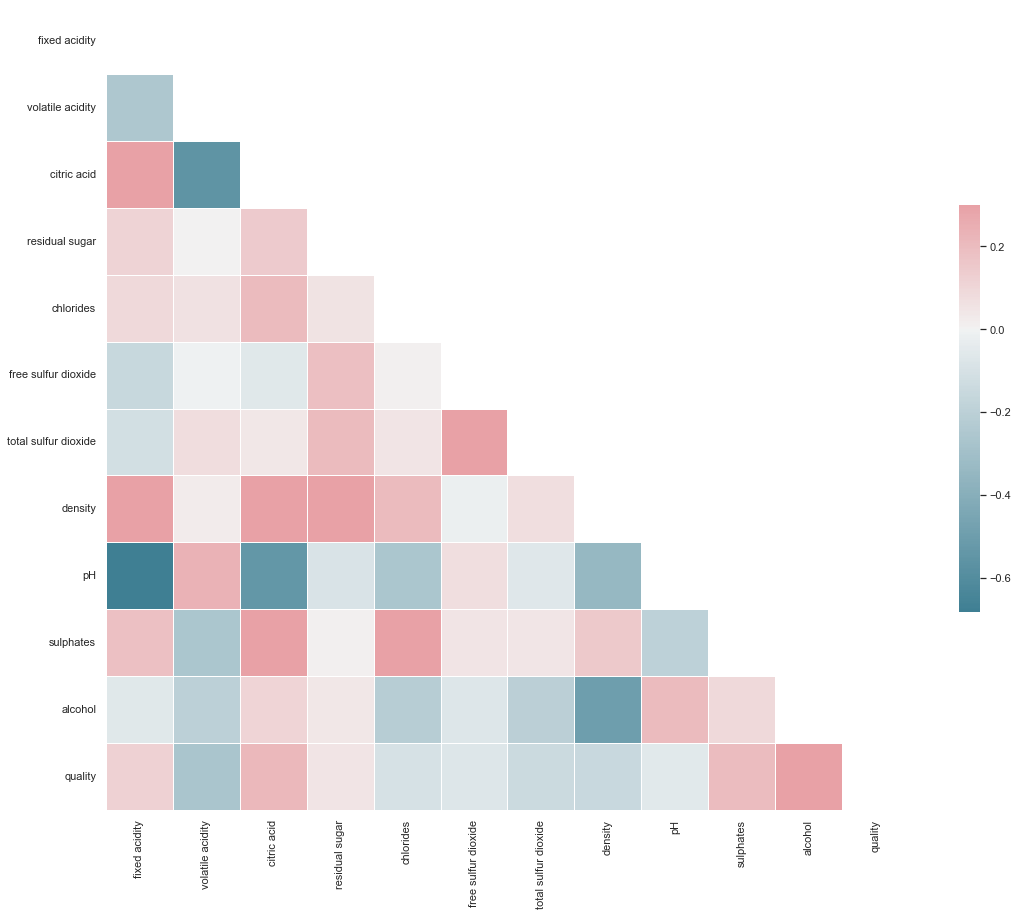

In [15]:

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Feature Enggineering

In [8]:
#Assigning and dividing the dataset
X = wine.drop('quality',axis=1)
y=wine['quality']
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
y.head(9)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
Name: quality, dtype: int32

In [10]:
features = wine.columns[:11]

In [11]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features[i],importances[indices[i]]))

 1) fixed acidity                  0.178690
 2) volatile acidity               0.128748
 3) citric acid                    0.106496
 4) residual sugar                 0.095718
 5) chlorides                      0.089280
 6) free sulfur dioxide            0.083482
 7) total sulfur dioxide           0.070669
 8) density                        0.070104
 9) pH                             0.060459
10) sulphates                      0.060048
11) alcohol                        0.056307


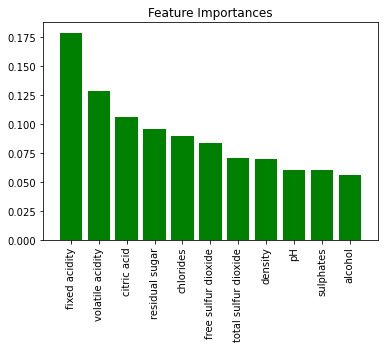

In [12]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features,rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

In [15]:
#Using Principal Dimensional Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(pd.DataFrame(explained_variance))

          0
0  0.281687
1  0.171462
2  0.143245
3  0.114765


### Logistic Regression

In [16]:
#### Model Building ####

## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.678125   0.247788  0.608696  0.352201


### SVM (Linear)

In [49]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.678125   0.247788  0.608696  0.352201
1         SVM (Linear)  0.856250   0.000000  0.000000  0.000000


C:\Users\tk\AppData\Local\Temp\ipykernel_10532\1209221350.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


### Randomforest

In [21]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                   Model  Accuracy  Precision    Recall  F1 Score
0    Logistic Regression  0.678125   0.247788  0.608696  0.352201
1  Random Forest (n=100)  0.156250   0.136364  0.913043  0.237288


C:\Users\tk\AppData\Local\Temp\ipykernel_20132\3241353490.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


### Model Evalutation


In [19]:
## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.87 (+/- 0.05)


In [22]:
# Applying Grid Search

# Round 1: Entropy
parameters = {"max_depth": [3, None],
              
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 27.71 seconds


(0.8991510826771654,
 {'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2})

In [53]:
# Round 2: Entropy
parameters = {"max_depth": [None],
             
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 7.78 seconds


(0.8881951279527559,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 8})

In [54]:
# Round 1: Gini
parameters = {"max_depth": [3, None],
              
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}
# Make sure classifier points to the RF model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, 
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 22.81 seconds


(0.8983698326771654,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2})

In [55]:
# Round 2: Gini
parameters = {"max_depth": [None],
              
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 5.93 seconds


(0.8819389763779528,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'min_samples_leaf': 8,
  'min_samples_split': 2})

In [56]:

#So the best grid seacrh is for Gini round 1
rf_best_accuracy, rf_best_parameters

(0.8819389763779528,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'min_samples_leaf': 8,
  'min_samples_split': 2})

### Prediction results

In [57]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tk\AppData\Local\Temp\ipykernel_10532\1111072313.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.678125,0.247788,0.608696,0.352201
1,SVM (Linear),0.856250,0.000000,0.000000,0.000000
2,Random Forest (n=100),0.156250,0.136364,0.913043,0.237288
3,"Random Forest (n=100, GSx2 + Gini)",0.856250,0.000000,0.000000,0.000000
